# 1. Bi-variate linear regression

# 1.1. Basic approach - least square estimate
One of the basic models to try, while learning dependence between two real-valued variables $X$ and $Y$ is linear:
$$
y=w_1 x + w_0.
$$
Admitting that the model's accuracy is not be absolute: 
$$
y=w_1 x + w_0 +\varepsilon,\hspace{5ex} (1)
$$
where $\varepsilon$ is the model's error (often called noise or residual).

The objective is to learn $b$ given a training set of $\{(x_i, y_i), i=1..N\}$. Usually the objetive is to find $w=(w_1,w_0)$ providing the best possible fit of the model, i.e. minimizing absolute values of the errors
$\varepsilon_i=x_i-w_1 y_i-w_0$.

Most common quality function for the given model is the residual sum of squares:
$$
RSS(w)=\sum\limits_i \varepsilon_i^2=\sum\limits_i (y_i-w_1 x_i-w_0)^2. \hspace{5ex} (2)
$$
Minimizing $RSS(w)\to min$ is called a least square approach. With respect to this criteria, regression becomes an optimization problem
$$
\hat{w}=argmin_w RSS(w). \hspace{5ex} (3)
$$
Luckily this problem has a precise analytic solution following from function's shape and local extremum criteria:
$$
\left\{\begin{array}{c}\frac{\partial RSS(\hat{w})}{\partial w_1}=0,\\ \frac{\partial RSS(\hat{w})}{\partial w_0}=0.\end{array}\right.
$$
i.e.
$$
\left\{\begin{array}{c}\sum\limits_i 2x_i(y_i-\hat{w}_1 x_i-\hat{w}_0)=0,\\ \sum\limits_i 2(y_i-\hat{w}_1 x_i-\hat{w}_0)=0,\end{array}\right.
$$
$$
\left\{\begin{array}{c}\hat{w}_1\left(\sum\limits_i (x_i)^2\right)+\hat{w}_0\left(\sum\limits_i x_i\right)=\sum\limits_i x_i y_i,\\ \hat{w}_1\left(\sum\limits_i x_i\right)+N \hat{w}_0=\sum\limits_i y_i,\end{array}\right.
$$
$$
\left\{\begin{array}{c}\hat{w}_1=\frac{\sum\limits_i x_i y_i-\left(\sum\limits_i y_i\right)\left(\sum\limits_i x_i\right)/N}{\sum\limits_i (x_i)^2-\left(\sum\limits_i x_i\right)^2/N}=\frac{E[XY]-E[X]E[Y]}{E[X^2]-E[X]^2}=\frac{E[X-E[X]][Y-E[X]]}{var[X]}=\frac{cov(X,Y)}{var[X]}=corr[X,Y]\frac{std[Y]}{std[X]},\\
\hat{w}_0=\frac{\sum\limits_i y_i-\hat{w}_1\left(\sum\limits_i x_i\right)}{N}=E[Y]-E[X]\hat{w}_1\end{array}\right.
$$

# 1.2. Example: real estate prices in NYC

In [1]:
import numpy as np
from numpy import random
from scipy import stats
import matplotlib.pyplot as plt
%pylab inline
import pandas as pd
import statsmodels.formula.api as smf

Populating the interactive namespace from numpy and matplotlib


In [5]:
path = 'C:\\Users\\fomyt\\Documents\\ADS_Fall2016\\Notebook\\data'
#data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
#url = "https://serv.cusp.nyu.edu/files/ADS-2015/FridayBootCamp/NYC_RE/NYC_RE_10466_multi.csv"
#f = urllib.urlopen(url)
#prices = np.loadtxt(f,delimiter=",")
#prices = np.loadtxt("/Users/stansobolevsky/Desktop/NYU/lectures/L1/codes/data/NYC_RE_10466_multi.csv",delimiter=",")
data1 = pd.read_csv(path+'\\NYC_RE_10466__multi.csv', index_col=0)
data1.head()

,gross_sq_feet,sale_price
1,7745,700000.0
2,3700,335000.0
3,5250,510000.0
4,4082,285000.0
5,4082,198558.0


Correlation = 0.92647798714
                            OLS Regression Results                            
Dep. Variable:             sale_price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     812.1
Date:                Thu, 08 Sep 2016   Prob (F-statistic):           9.99e-59
Time:                        13:55:01   Log-Likelihood:                -2038.2
No. Observations:                 136   AIC:                             4080.
Df Residuals:                     134   BIC:                             4086.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept      1.8

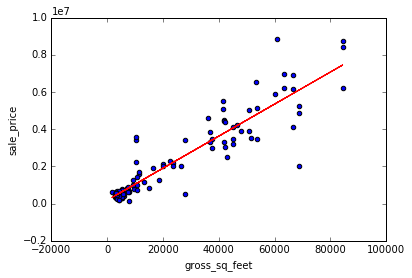

In [6]:
corr=stats.pearsonr(data1.gross_sq_feet,data1.sale_price)[0]
print('Correlation = {0}'.format(corr))

data1.plot(kind='scatter',x='gross_sq_feet',y='sale_price')
lm = smf.ols(formula='sale_price ~ gross_sq_feet', data = data1).fit()
#pd.DataFrame({'gross_sq_feet': data.gross_sq_feet})
print(lm.summary())
lmy = lm.predict(data)
plt.plot(data1.gross_sq_feet,lmy,'r-')

# 1.3. Probabilistic approach

Uncertainty of the model (1) prediction can be expressed by considering $\varepsilon$ as a random variable representing deviations of the actual values of $y$ from the estimates provided by the precise linear model. A basic assumption is to have $\varepsilon\sim{\cal N}(0,\sigma^2)$ (mean is zero as otherwise the intercept term $w_0$ could be corrected accordingly). 

Often observations $y_i,x_i$ are spread in time ($i$ - could be time of the observation). 
Classical regression assumptions (Gauss-Markov): $\sigma$ is the same for all observations (does not depend on time) and errors $\varepsilon_i$ following ${\cal N}(0,\sigma^2)$ are mutually uncorrelated, i.e. $cov(\epsilon_i,\epsilon_j)=0$ for $i\neq j$. 

An alternative way of representing this linear model is by considering $y$ a random variable and expressing it's conditional probability density function with respect to given $x$ and $w$ as
$$
p(y|x,w)={\cal N}(y|w_1 x+w_0,\sigma^2).\hspace{5ex} (4)
$$

This way it is actually the mean of the distribution (4) which is predicted by a linear model/
Now the problem is to fit unknown parameters of the model $w_1,w_0,\sigma$ (the last one $\sigma$ represents how usually close are the values of $y$ to the linear prediction), so that the model is the most consistent with the training data $\{(x_j,y_j), j=1..N\}$.

Fitting could be done through through maximizing the likelihood that the observed data $y_j$ actually follows the suggested distribution (4). Likelihood is defined as a product of probability density values $\prod\limits_j p(y_j|x_j)$. But it's actually more practical to maximize the log-likelihood (which is equivalent):
$$
\log\left(\prod\limits_j p(y_j|x_j)\right)=\sum\limits_j \log\left({\cal N}(y|w_1 x+w_0,\sigma^2)\right)=
$$$$
=-\sum\limits_j \frac{(y_j-w_1 x_j+w_0)^2}{2\sigma^2}- N \log(\sigma)-N \log(\sqrt{2\pi})\to\max
$$
Optimization with respect to $w$ turns out to be equivalent to the above least-square minimization (3). Then for minimal $RSS(\hat{w})$ acheived, $\sigma$ could be found from
$$
\frac{RSS(\hat{w})}{2\sigma^2}+N\log(\sigma)\to\min
$$$$
\frac{\partial\frac{RSS(\hat{w})}{2\sigma^2}+N\log(\sigma)}{\partial \sigma}=0,
$$$$
-\frac{RSS(\hat{w})}{\sigma^3}+\frac{N}{\sigma}=0,
$$$$
\sigma^2=\frac{RSS(\hat{w})}{N}.
$$

In [7]:
data2 = pd.read_csv(path+'\\NYC_RE_11209__single.csv', index_col=0)
data2.head()

,gross_sq_feet,sale_price
1,1400,585000.0
2,1224,515000.0
3,1836,499900.0
4,1330,525000.0
5,1224,400000.0


                            OLS Regression Results                            
Dep. Variable:         log_sale_price   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     333.3
Date:                Thu, 08 Sep 2016   Prob (F-statistic):           3.36e-64
Time:                        13:55:37   Log-Likelihood:                -466.35
No. Observations:                 968   AIC:                             936.7
Df Residuals:                     966   BIC:                             946.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept             8.6718      0.26

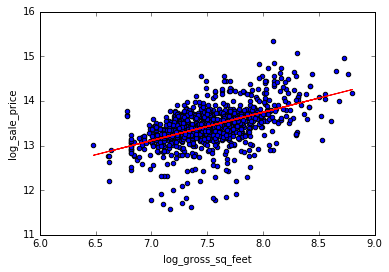

In [8]:
datalog=pd.DataFrame({'log_gross_sq_feet': log(data2.gross_sq_feet),'log_sale_price':log(data2.sale_price)})
datalog.plot(kind='scatter',x='log_gross_sq_feet',y='log_sale_price')
llm = smf.ols(formula='log_sale_price ~ log_gross_sq_feet', data = datalog).fit()
print(llm.summary())
lmy = llm.predict(datalog)
plt.plot(datalog.log_gross_sq_feet,lmy,'r-')

# 1.4. Regression statistics

R2, confidence intervals, p-value

# 1.5. Scaling: log-scale regression

Consider how flickr activity of foriegn visitors in Spanish Large Urban Zones (LUZs) scale with LUZ size

In [9]:
data3 = pd.read_csv(path+'\\spain_scaling.csv', index_col=0)
data3.head()
#corr=stats.pearsonr(data.gross_sq_feet,data.sale_price)[0]
#print('Correlation={0}'.format(corr))

,Population,Cards,Twitter,Flickr
1,288490,12119,1115,458
2,124100,3873,417,140
3,424460,27649,2210,1117
4,426000,26911,1731,1213
5,376203,31010,2496,910


,Population,Cards,Twitter,Flickr
1,12.572416,12119,7.016610,6.126869
2,11.728843,3873,6.033086,4.941642
3,12.958573,27649,7.700748,7.018402
4,12.962195,26911,7.456455,7.100852
5,12.837884,31010,7.822445,6.813445
6,13.795284,153967,8.563695,8.623893
7,12.990882,257734,8.505728,8.572817
8,10.026899,465,6.224558,5.043425
9,11.544821,6135,5.433722,5.030438
10,10.734612,222,4.465908,-inf


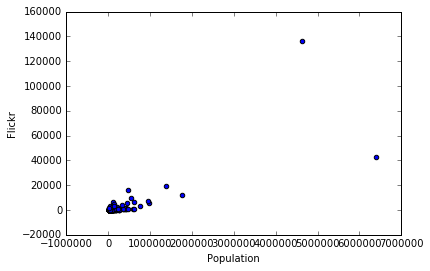

In [10]:
#plt.figure()
#data.plot(kind='scatter',x='Population',y='Cards')
#plt.figure()
#data.plot(kind='scatter',x='Population',y='Twitter')
plt.figure(figsize = (20,15))
data3=data3.loc[data3.Twitter>0,:]
data3.plot(kind='scatter',x='Population',y='Flickr')
data3.Population=log(data3.Population)
data3.Flickr=log(data3.Flickr)
data3.Twitter=log(data3.Twitter)
#plt.figure(figsize = (20,15))
#data.plot(kind='scatter',x='Population',y='Flickr')
#lm = smf.ols(formula='Flickr ~ Population', data = data).fit()
#print(lm.summary())
#lmy = lm.predict(data)
#plt.plot(data.Population,lmy,'r-')
data3

                            OLS Regression Results                            
Dep. Variable:                Twitter   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     201.2
Date:                Thu, 08 Sep 2016   Prob (F-statistic):           2.62e-32
Time:                        13:57:47   Log-Likelihood:                -362.62
No. Observations:                 208   AIC:                             729.2
Df Residuals:                     206   BIC:                             735.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -7.7490      0.964     -8.038      0.0

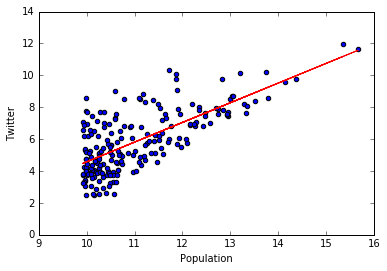

In [12]:
plt.figure(figsize = (20,15))
data3.plot(kind='scatter',x='Population',y='Twitter')
lm = smf.ols(formula='Twitter ~ Population', data = data3).fit()
print(lm.summary())
lmy = lm.predict(data3)
plt.plot(data3.Population,lmy,'r-')

In [13]:
data3.loc[data3.Flickr>0,:]

,Population,Cards,Twitter,Flickr
1,12.572416,12119,7.016610,6.126869
2,11.728843,3873,6.033086,4.941642
3,12.958573,27649,7.700748,7.018402
4,12.962195,26911,7.456455,7.100852
5,12.837884,31010,7.822445,6.813445
6,13.795284,153967,8.563695,8.623893
7,12.990882,257734,8.505728,8.572817
8,10.026899,465,6.224558,5.043425
9,11.544821,6135,5.433722,5.030438
12,11.897296,55073,7.905810,7.959975


In [26]:
data3 = pd.read_csv(path+'\\spain_scaling.csv', index_col=0)
data3.head()

,Population,Cards,Twitter,Flickr
1,288490,12119,1115,458
2,124100,3873,417,140
3,424460,27649,2210,1117
4,426000,26911,1731,1213
5,376203,31010,2496,910


In [27]:
def LogIt(series):
    for i in range(len(series)):
        series[i] = float(np.log(series[i]))

In [28]:
d = data3.iloc[1,:]

In [29]:
d

Population    124100
Cards           3873
Twitter          417
Flickr           140
Name: 2, dtype: int64

In [30]:
LogIt(d)

In [31]:
d

Population    11
Cards          8
Twitter        6
Flickr         4
Name: 2, dtype: int64